<a href="https://colab.research.google.com/github/sayanarajasekhar/PyTorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Explore an example of PyTorch end-to-end workflow

In [ ]:
what_we_are_doing = {1: "Data (Prepare and Load)",
                     2: "Build Model",
                     3: "Fitting the model to data (Training)",
                     4: "Make predictions and Evaluting model (Inference)",
                     5: "Saving and Loading the model",
                     6: "Putting all together"}
what_we_are_doing

{1: 'Data (Prepare and Load)',
 2: 'Build Model',
 3: 'Fitting the model to data (Training)',
 4: 'Make predictions and Evaluting model (Inference)',
 5: 'Saving and Loading the model',
 6: 'Putting all together'}

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building block from neural networks
import matplotlib.pyplot as plt

# Check PyTorch Version
torch.__version__

'2.8.0+cu126'

## 1. Data (Prepare and Load)

Data can be almost anything... in Machine learning

* Excel speadsheet
* Image of any kind
* Videos
* Audio
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representaion.
2. Build a model to learn patterns from the numerical representaion.

To showcase this, let's create some *known* data using the **Linear Regression Formaula**

A linear regression line has an equation of the form `Y = bX + a`, where `X` is the explanatory variable and `Y` is the dependent variable. The slope/gradient of the line is `b` and `a` is the intercept (the value of y when x = 0)

We'll use a linear regression formula to make a string line with *know* **parameters**


In [ ]:
# Create *know* parameters

weight = 0.7 # weight == b
bias = 0.3 # bias == a

# Create a range of numbers
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concept in macine learning in general)

One of most important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each split of the dataset serves a specific purpose:

| Split |	Purpose	| Amount of <br>total data | How often is <br>it used? |
|------|------|------|------|
| **Training set** | The model learns from this data <br>(like the course materials you study during the semester). | ~60-80% | Always |
| **Validation set** | The model gets tuned on this data <br>(like the practice exam you take before the final exam).	| ~10-20%	| Often <br>but not always |
| **Testing set**	| The model gets evaluated on this data to test what it has learned <br>(like the final exam you take at the end of the semester). | ~10-20% | Always |

Lets create training and testing datasets

In [ ]:
# Create a train/test split

train_split = int(0.8 * len(X)) # 80% of original data == 40 is used as training data
print(train_split)

40


In [ ]:
X_train, y_train = X[:train_split], y[:train_split] # 80% is split for training model
X_test, y_test = X[train_split:], y[train_split:] # 20@ is split for testing model

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualize data

In [ ]:
# Visualizing data using matplotlib
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training Data')

  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label='Test Data')

  # If predictions
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  # Show legends
  plt.legend(prop={'size': 14})

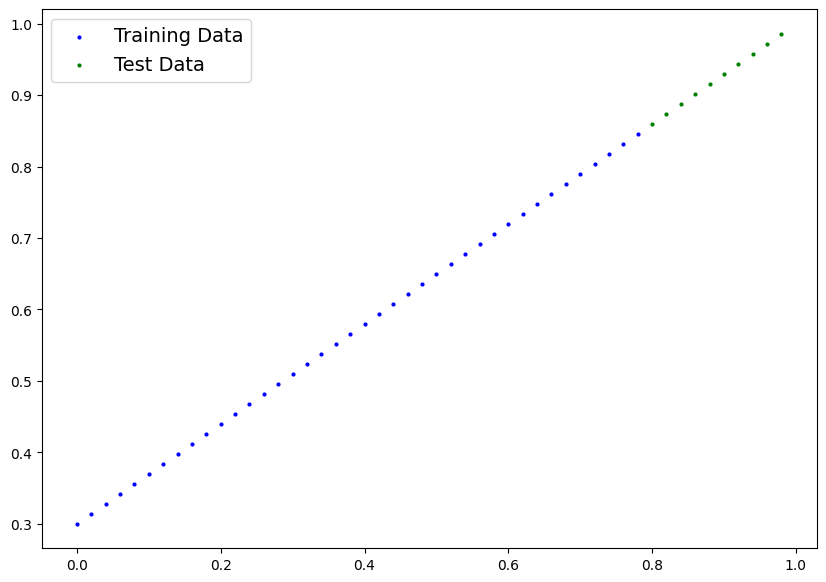

In [ ]:
plot_predictions()

## 2. Build model

Let's build linear regression model

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (weight & bias values we used to create data)

How does it do so ?

Through two main algorithms
1. Gradient descent - https://youtu.be/IHZwWFHWa-w
2. Backpropagation - https://youtu.be/Ilg3gGewQ5U

In [ ]:
from torch import nn # nn contains all of PyTorch's building block from neural networks
import torch

# Creare linear regression model class

class LinearRegressionModel(nn.Module): # Almost everything in PyTorch inhernits from nn.module

  def __init__(self):
    super().__init__()

    # Initialize model parameters
    self.weight = nn.Parameter(torch.randn(1, # <- start with random weights   (this will get adjusted as the model learns)
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is input data
    return self.weight * x + self.bias # Linear regression formula

### PyTorch model building essentials

| PyTorch module | What does it do?|
|----------------|-----------------|
| [torch.nn](https://pytorch.org/docs/stable/nn.html) | Contains all of the building blocks for computational graphs <br>(essentially a series of computations executed in a particular way). |
| [torch.nn.Parameter](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | Stores tensors that can be used with nn.Module. If requires_grad=True gradients <br>(used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd". |
| [torch.nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module)	| The base class for all neural network modules, all the building blocks for neural networks are subclasses. <br>If you're building a neural network in PyTorch, your models should subclass nn.Module. <br>Requires a forward() method be implemented. |
| [torch.optim](https://pytorch.org/docs/stable/optim.html)	| Contains various optimization algorithms <br>(these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss). |
| def forward()	| All nn.Module subclasses require a forward() method, <br>this defines the computation that will take place on the data passed to the particular nn.Module <br>(e.g. the linear regression formula above). |

* `torch.nn` - Contains all of the building blocks for computational graphs ( a neural network can be considered as computational graph )
* `torch.nn.parameters` -  what parameters should our model try and learn, often a Pytorch layer from `torch.nn` will set these for us.
* `torch.nn.Module` - The base class for all neural network modules, if you subclass it, you should overwrite `forward()` method
* `torch.optim` - This is where the optimizers in PyTorch live, they will help with gradient descent
* `def forward()` - All nn.Modules subclasses require you to overwrite `forward()`, this method defines what happens in the forward computation

https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch model

* `list(model.parameters())` - returns parameters values and its required_grad details
* `model.state_dict()` - returns parameters names and there values

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()

# Check the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named model parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well model predicts `y_test` based on `X_test`

When we pass data through our model, it's going to run it through `forward()` method

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


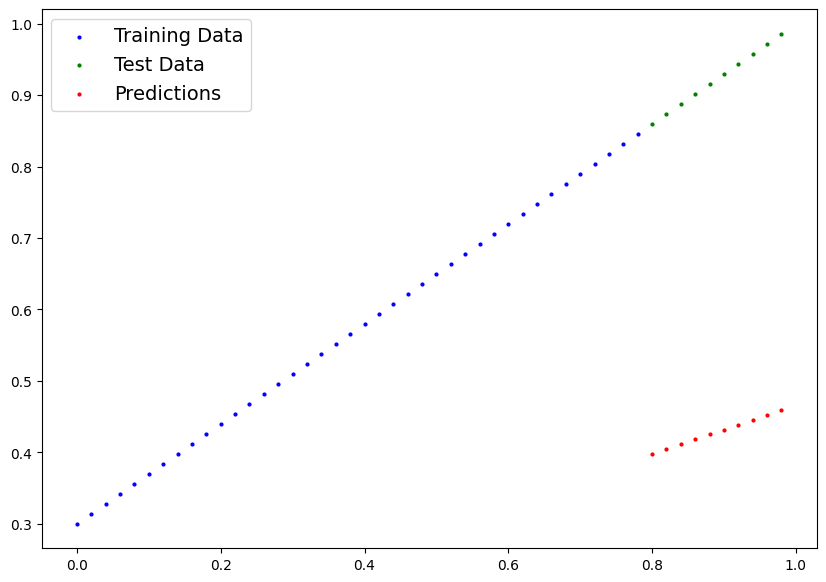

In [ ]:
# Make predictions with model
with torch.inference_mode(): # context manager - turns of gradients
  y_preds = model_0(X_test)

# You can also do something similar with torch.no_grad, but torch.inference_mode is prefered

print(y_test, y_preds, sep='\n')
plot_predictions(predictions=y_preds)

### 3. Train model

The whole idea of training is, for a model to move from some *unknow* parameters (randoms values) to some *known* parameters

Or in other words from a poor representation of the data to a better representation of the data

One way to measure how poor model predictions are is to use **loss function**

* Note: **Loss function** may also called as **cost functon** or **criterion** in different areas

Things we need to train

* **Loss Function:** A function to measure how wrong model predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias) to improve loss function.

And specifically for PyTorch, we need:
* A training loop
* A testing loop

| Function | What does it do?	| Where does it live <br>in PyTorch?	| Common values |
|----------|------------------|-------------|------|
|**Loss function**|	Measures how wrong your model's predictions <br>(e.g. y_preds) are compared to the truth labels <br>(e.g. y_test). Lower the better. | PyTorch has plenty of built-in loss <br>functions in [torch.nn](https://pytorch.org/docs/stable/nn.html#loss-functions).	| Mean absolute error (MAE) for regression problems <br>( [torch.nn.L1Loss()](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html) ). Binary cross entropy for <br>binary classification problems ( [torch.nn.BCELoss()](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) ).|
| **Optimizer**	| Tells your model how to update its internal <br>parameters to best lower the loss.	| You can find various optimization <br>function implementations in [torch.optim](https://pytorch.org/docs/stable/optim.html). |	Stochastic gradient descent ( [torch.optim.SGD()](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD) ). <br>Adam optimizer ( [torch.optim.Adam()](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam) ). |

#### Setup Loss Function

In [ ]:
# Setup loss function
loss_fn = nn.L1Loss()

#### Setup Optimizer

In [ ]:
# Setup optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameter, you will set


#### Building a training loop and testing loop in PyTorch

A couple of things we need in a training loop:

0. Loop through the data
1. Forward pass ( this involves data moving through the model `forward()` function to make predications on data - also called as **Forward Propagation**
2. Calculate the loss ( compare forward pass predications to ground truth labels )
3. Optimizer zero grad
4. Loss backward - move backward through the network to calculate the gradients of each of the parameters in our model with respect to the loss ( **Back Propagation** )
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss

In [ ]:
# Model parameter before training
model_0.state_dict()

# An epoch is one loop through the data... (this is a hyperparameter because we've set it ourselves)
epochs = 100

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to True

  # model_0.eval() # sets require gradient to False

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will acculumate through the loop so.. we have to zero them above in step 3 for the next iteration

### Testing loop
  # Set the mode in testing loop
  model_0.eval() # eval mode in PyTorch sets all parameters that require gradients to False

  with torch.inference_mode():
    # 1. Forward loop
    y_preds_new = model_0(X_test)

    # 2. Calcaulate loss
    test_loss = loss_fn(y_preds_new, y_test)

    # Print out what's happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
      print(f"Parameters : {model_0.state_dict()}")


Epoch: 0 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Parameters : OrderedDict({'weight': tensor([0.6951]), 'bias': tensor([0.2993])})
Epoch: 10 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Parameters : OrderedDict({'weight': tensor([0.6951]), 'bias': tensor([0.2993])})
Epoch: 20 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Parameters : OrderedDict({'weight': tensor([0.6951]), 'bias': tensor([0.2993])})
Epoch: 30 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Parameters : OrderedDict({'weight': tensor([0.6951]), 'bias': tensor([0.2993])})
Epoch: 40 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Parameters : OrderedDict({'weight': tensor([0.6951]), 'bias': tensor([0.2993])})
Epoch: 50 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Parameters : OrderedDict({'weight': tensor([0.6951]), 'bias': tensor([0.2993])})
Epoch: 60 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Para

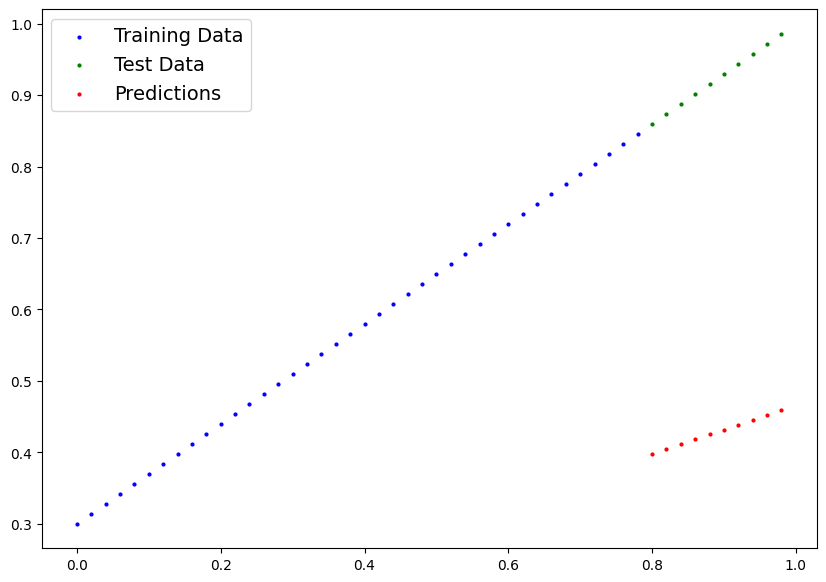

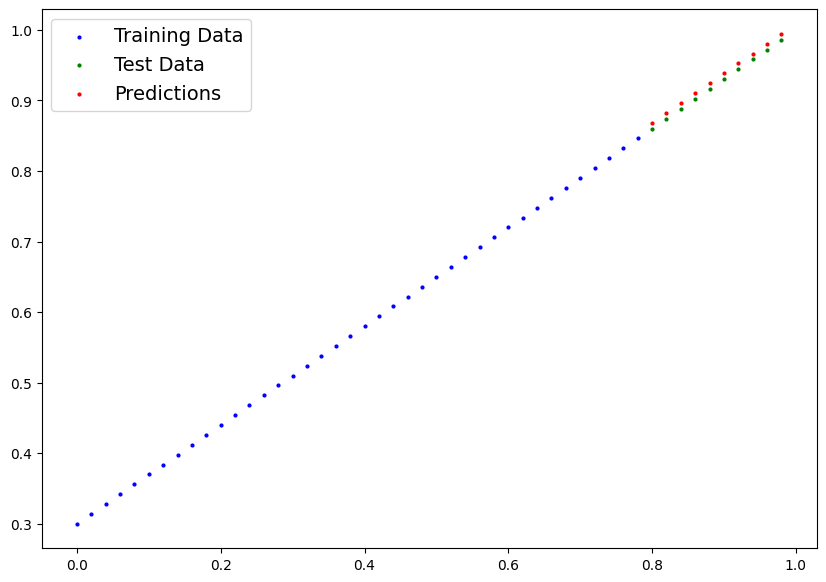

In [ ]:
# Visilization before and after training
plot_predictions(predictions=y_preds)
plot_predictions(predictions=y_preds_new)